# NBA Salaries QuAM D2

## D2: Final Dataset - Data Collection, Analysis, Wrangling, Feature Engineering

### By Andrej Pozderac & Andrew Edward

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 100

## D2.1: Data Collection

________________Paragraph about datasets

## D2.2: Data Analysis

## Dataset 1: NBA Players salaries

You can find the dataset here: https://www.kaggle.com/whitefero/nba-player-salary-19902017

In [2]:
# Read the CSV file
salaries = pd.read_csv('./player_salaries/salaries_per_year.csv')
salaries.head()

,Register Value,Player Name,Salary,Season Start,Season End,Team,Full Team Name
0,1,A.C. Green,"$1,750,000.00",1990,1991,LAL,Los Angeles Lakers
1,354,A.C. Green,"$1,750,000.00",1991,1992,LAL,Los Angeles Lakers
2,727,A.C. Green,"$1,750,000.00",1992,1993,LAL,Los Angeles Lakers
3,1103,A.C. Green,"$1,885,000.00",1993,1994,PHO,Phoenix Suns
4,1497,A.C. Green,"$6,472,600.00",1994,1995,PHO,Phoenix Suns


In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11837 entries, 0 to 11836
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Register Value  11837 non-null  int64 
 1   Player Name     11837 non-null  object
 2   Salary          11837 non-null  object
 3   Season Start    11837 non-null  int64 
 4   Season End      11837 non-null  int64 
 5   Team            11837 non-null  object
 6   Full Team Name  11837 non-null  object
dtypes: int64(3), object(4)
memory usage: 647.5+ KB


In [4]:
nans = np.sum(salaries.isnull())

print('Invalid enteries in the salaries file:')
print(nans)

Invalid enteries in the salaries file:
Register Value    0
Player Name       0
Salary            0
Season Start      0
Season End        0
Team              0
Full Team Name    0
dtype: int64


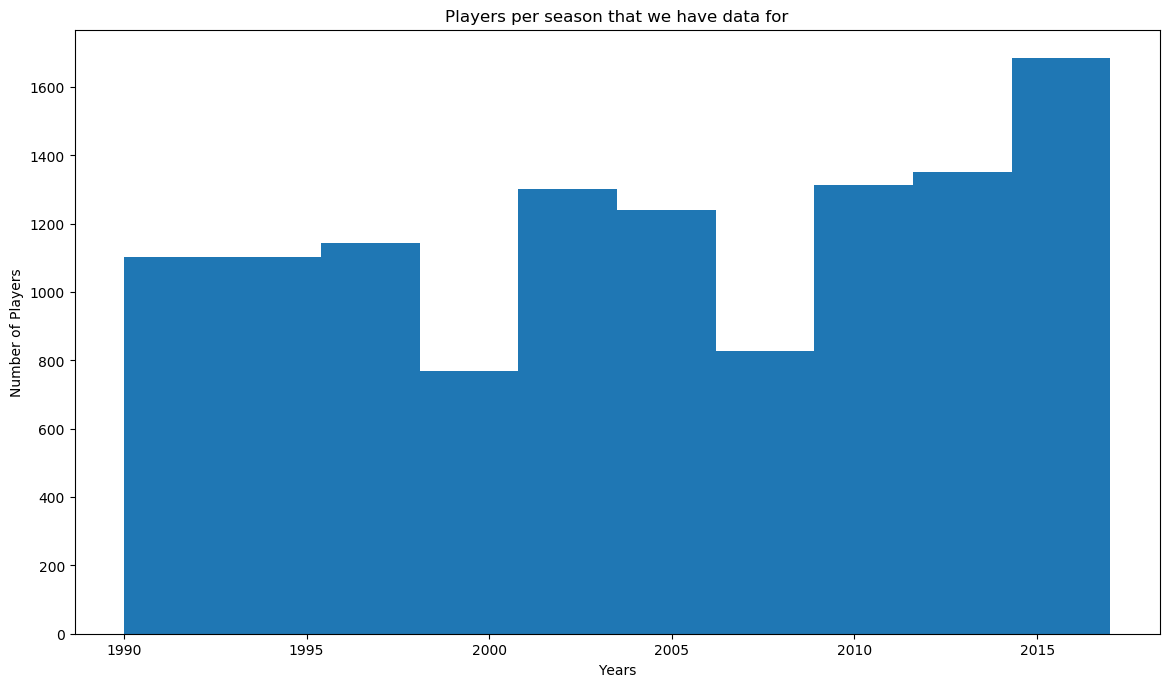

In [5]:
# plt.show()
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(14, 8))

axs.hist(x=salaries['Season Start'])
axs.set_title('Players per season that we have data for')
axs.set_xlabel('Years')
axs.set_ylabel('Number of Players')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
# plt.show()


For this dataset, we don't have any missing values as you can see

From the head of the salaries dataset, we can see that we have salaries only starting from 1990, so we will have to keep that in mind when merging the datasets and creating our final dataset

## Dataset 2: NBA Players Stats

You can find the dataset here: https://www.kaggle.com/drgilermo/nba-players-stats

This dataset was composed of 3 CSVs, we chose to cut the "player_data.csv" since it didn't match correctly with the other two datasets.
The information it held did not impact the progeress as similar info already exists in the more consistent "players.csv" file.

We first decided to match the stats data to our other target dataset (more below) of salaries in terms of years. We cut the entires before 1990 as to keep it consistent with the salaries dataset. We did this also because we saw more robust entry of stat information in the later years.

In [6]:
# Read the CSV file
players = pd.read_csv('./player_stats/players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [8]:
players.describe

<bound method NDFrame.describe of       Unnamed: 0             Player  height  weight  \
0              0    Curly Armstrong   180.0    77.0   
1              1       Cliff Barker   188.0    83.0   
2              2      Leo Barnhorst   193.0    86.0   
3              3         Ed Bartels   196.0    88.0   
4              4        Ralph Beard   178.0    79.0   
...          ...                ...     ...     ...   
3917        3917      Troy Williams   198.0    97.0   
3918        3918       Kyle Wiltjer   208.0   108.0   
3919        3919  Stephen Zimmerman   213.0   108.0   
3920        3920        Paul Zipser   203.0    97.0   
3921        3921        Ivica Zubac   216.0   120.0   

                              collage    born      birth_city  \
0                  Indiana University  1918.0             NaN   
1              University of Kentucky  1921.0        Yorktown   
2            University of Notre Dame  1924.0             NaN   
3     North Carolina State University  1925.0

In [9]:
nans = np.sum(players.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64


In [10]:
# Read the CSV file
seasons = pd.read_csv('./player_stats/seasons_stats.csv')
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [11]:
seasons.dtypes

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

In [12]:
seasons.describe

<bound method NDFrame.describe of        Unnamed: 0    Year             Player  Pos   Age   Tm     G    GS  \
0               0  1950.0    Curly Armstrong  G-F  31.0  FTW  63.0   NaN   
1               1  1950.0       Cliff Barker   SG  29.0  INO  49.0   NaN   
2               2  1950.0      Leo Barnhorst   SF  25.0  CHS  67.0   NaN   
3               3  1950.0         Ed Bartels    F  24.0  TOT  15.0   NaN   
4               4  1950.0         Ed Bartels    F  24.0  DNN  13.0   NaN   
...           ...     ...                ...  ...   ...  ...   ...   ...   
24686       24686  2017.0        Cody Zeller   PF  24.0  CHO  62.0  58.0   
24687       24687  2017.0       Tyler Zeller    C  27.0  BOS  51.0   5.0   
24688       24688  2017.0  Stephen Zimmerman    C  20.0  ORL  19.0   0.0   
24689       24689  2017.0        Paul Zipser   SF  22.0  CHI  44.0  18.0   
24690       24690  2017.0        Ivica Zubac    C  19.0  LAL  38.0  11.0   

           MP   PER  ...    FT%    ORB    DRB    TRB 

In [13]:
nans = np.sum(seasons.isnull())

print('Invalid enteries in Seasons dataset:')
print(nans)

Invalid enteries in Seasons dataset:
Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL

In [14]:
seasons = seasons[seasons['Year'] >= 1991]

In [15]:
seasons

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10007,10007,1991.0,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,290.0,13.1,...,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0
10008,10008,1991.0,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,1505.0,12.2,...,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0
10009,10009,1991.0,Mark Acres,C,28.0,ORL,68.0,0.0,1313.0,9.2,...,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0
10010,10010,1991.0,Michael Adams,PG,28.0,DEN,66.0,66.0,2346.0,22.3,...,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0
10011,10011,1991.0,Mark Aguirre,SF,31.0,DET,78.0,13.0,2006.0,16.7,...,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


## D2.3: Data Wrangling

In [16]:
df_NBA = pd.merge(seasons, salaries,  how='left', left_on=['Player','Year'], right_on = ['Player Name','Season End'])

In [17]:
df_NBA

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Register Value,Player Name,Salary,Season Start,Season End,Team,Full Team Name
0,10007,1991.0,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,290.0,13.1,...,22.0,39.0,135.0,6.0,Alaa Abdelnaby,"$395,000.00",1990.0,1991.0,POR,Portland Trail Blazers
1,10008,1991.0,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,1505.0,12.2,...,110.0,149.0,942.0,214.0,Mahmoud Abdul-Rauf,"$1,660,000.00",1990.0,1991.0,DEN,Denver Nuggets
2,10009,1991.0,Mark Acres,C,28.0,ORL,68.0,0.0,1313.0,9.2,...,42.0,218.0,285.0,218.0,Mark Acres,"$437,000.00",1990.0,1991.0,ORL,Orlando Magic
3,10010,1991.0,Michael Adams,PG,28.0,DEN,66.0,66.0,2346.0,22.3,...,240.0,162.0,1752.0,228.0,Michael Adams,"$825,000.00",1990.0,1991.0,DEN,Denver Nuggets
4,10011,1991.0,Mark Aguirre,SF,31.0,DET,78.0,13.0,2006.0,16.7,...,128.0,209.0,1104.0,219.0,Mark Aguirre,"$1,115,000.00",1990.0,1991.0,DET,Detroit Pistons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15265,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,65.0,189.0,639.0,10826.0,Cody Zeller,"$5,318,313.00",2016.0,2017.0,CHA,Charlotte Hornets
15266,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,20.0,61.0,178.0,11299.0,Tyler Zeller,"$8,000,000.00",2016.0,2017.0,BOS,Boston Celtic
15267,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,3.0,17.0,23.0,11255.0,Stephen Zimmerman,"$950,000.00",2016.0,2017.0,ORL,Orlando Magic
15268,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,40.0,78.0,240.0,11187.0,Paul Zipser,"$750,000.00",2016.0,2017.0,CHI,Chicago Bulls


In [18]:
df_NBA.dropna(subset=['Player Name'], inplace=True)

In [19]:
nans = np.sum(df_NBA.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Unnamed: 0            0
Year                  0
Player                0
Pos                   0
Age                   0
Tm                    0
G                     0
GS                    0
MP                    0
PER                   5
TS%                  55
3PAr                 58
FTr                  58
ORB%                  5
DRB%                  5
TRB%                  5
AST%                  5
STL%                  5
BLK%                  5
TOV%                 45
USG%                  5
blanl             12730
OWS                   0
DWS                   0
WS                    0
WS/48                 5
blank2            12730
OBPM                  0
DBPM                  0
BPM                   0
VORP                  0
FG                    0
FGA                   0
FG%                  58
3P                    0
3PA                   0
3P%                2094
2P                    0
2PA                   0
2P%                  89
eF

In [20]:
df_NBA.drop(['Unnamed: 0','blanl','blank2', 'Tm','Full Team Name','Season Start','Season End','Player Name','Register Value'], inplace=True, axis=1)

In [21]:
nans = np.sum(df_NBA.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Year         0
Player       0
Pos          0
Age          0
G            0
GS           0
MP           0
PER          5
TS%         55
3PAr        58
FTr         58
ORB%         5
DRB%         5
TRB%         5
AST%         5
STL%         5
BLK%         5
TOV%        45
USG%         5
OWS          0
DWS          0
WS           0
WS/48        5
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         58
3P           0
3PA          0
3P%       2094
2P           0
2PA          0
2P%         89
eFG%        58
FT           0
FTA          0
FT%        518
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Salary       0
Team         0
dtype: int64


In [22]:
df_NBA[['3P', '3PA','3P%']]

,3P,3PA,3P%
0,0.0,0.0,NaN
1,24.0,100.0,0.240
2,1.0,3.0,0.333
3,167.0,564.0,0.296
4,24.0,78.0,0.308
...,...,...,...
15265,0.0,1.0,0.000
15266,0.0,1.0,0.000
15267,0.0,0.0,NaN
15268,33.0,99.0,0.333


In [23]:
indices= df_NBA[ (df_NBA['3P'] == 0) & (df_NBA['3PA'] == 0) & (df_NBA['3P%'] != 0)].index

df_NBA.drop(indices, inplace = True)

In [24]:
df_NBA

,Year,Player,Pos,Age,G,GS,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team
1,1991.0,Mahmoud Abdul-Rauf,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,...,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,"$1,660,000.00",DEN
2,1991.0,Mark Acres,C,28.0,68.0,0.0,1313.0,9.2,0.551,0.014,...,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,"$437,000.00",ORL
3,1991.0,Michael Adams,PG,28.0,66.0,66.0,2346.0,22.3,0.530,0.397,...,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,"$825,000.00",DEN
4,1991.0,Mark Aguirre,SF,31.0,78.0,13.0,2006.0,16.7,0.526,0.086,...,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,"$1,115,000.00",DET
5,1991.0,Danny Ainge,SG,31.0,80.0,0.0,1710.0,17.0,0.574,0.352,...,160.0,205.0,285.0,63.0,13.0,100.0,195.0,890.0,"$725,000.00",POR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15264,2017.0,Thaddeus Young,PF,28.0,74.0,74.0,2237.0,14.9,0.562,0.172,...,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0,"$14,153,652.00",IND
15265,2017.0,Cody Zeller,PF,24.0,62.0,58.0,1725.0,16.7,0.604,0.002,...,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,"$5,318,313.00",CHA
15266,2017.0,Tyler Zeller,C,27.0,51.0,5.0,525.0,13.0,0.508,0.006,...,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,"$8,000,000.00",BOS
15268,2017.0,Paul Zipser,SF,22.0,44.0,18.0,843.0,6.9,0.503,0.448,...,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,"$750,000.00",CHI


In [25]:
# def fill_3P(row):
#     if row['3P%'] == np.NaN:
#         if row['3PA'] == 0:
#             print("Hi")
#             return 0
#         else:
#             x = (row['3P'] / row['3PA'])
#             return x
#     else:
#         return row['3P%']

In [26]:
# df_NBA['3P%'] = df_NBA.apply(lambda row: fill_3P(row), axis=1)

In [27]:
df_NBA[['3P', '3PA','3P%']]

,3P,3PA,3P%
1,24.0,100.0,0.240
2,1.0,3.0,0.333
3,167.0,564.0,0.296
4,24.0,78.0,0.308
5,102.0,251.0,0.406
...,...,...,...
15264,45.0,118.0,0.381
15265,0.0,1.0,0.000
15266,0.0,1.0,0.000
15268,33.0,99.0,0.333


In [28]:
nans = np.sum(df_NBA.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Year        0
Player      0
Pos         0
Age         0
G           0
GS          0
MP          0
PER         0
TS%         0
3PAr        0
FTr         0
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        0
USG%        0
OWS         0
DWS         0
WS          0
WS/48       0
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
2P          0
2PA         0
2P%        31
eFG%        0
FT          0
FTA         0
FT%       249
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
Salary      0
Team        0
dtype: int64


In [35]:
df_NBA.dropna(inplace=True)

In [36]:
nans = np.sum(df_NBA.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Year      0
Player    0
Pos       0
Age       0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Salary    0
Team      0
dtype: int64


## D2.4: Feature Engineering

In [ ]:
from sklearn import linear_model

X = df_NBA.iloc[3:,:-2]
Y = data[['Salary']]

# Create a linear regression object
OLS = linear_model.LinearRegression(fit_intercept=False) 

# Train the model using the training set, features and true labels
OLS.fit(X, Y)

Yhat = OLS.predict(X)